<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    machine learning 11
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
    Clustering / K-Means
  </div>


<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: پس از تکمیل این جلسه، شما قادر خواهید بود

از خوشه‌بندی $Means$-$K$ کتابخانه $learn$-$scikit$  برای خوشه‌بندی داده‌ها استفاده کنید 


<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

## مقدمه

مدل‌های زیادی برای **خوشه‌بندی** وجود دارد

 در این نوت‌بوک، مدلی را ارائه خواهیم داد که ساده‌ترین مدل در میان آن‌ها محسوب می‌شود
 
  با وجود سادگی، **$means$-$K$** به طور گسترده برای خوشه‌بندی در بسیاری از کاربردهای علم داده استفاده می‌شود
  
  به ویژه اگر نیاز به کشف سریع بینش از **داده‌های بدون برچسب** داشته باشید
  
   در این نوت‌بوک، یاد خواهید گرفت که چگونه از $means$-$K$ برای تقسیم‌بندی مشتریان استفاده کنید.

<br>
k-means برخی از کاربردهای واقعی:

*   تقسیم‌بندی مشتریان
*   درک هدف بازدیدکنندگان یک وب‌سایت
*   تشخیص الگو
*   یادگیری ماشین
*   فشرده‌سازی داده

در این نوت‌بوک، $means$-$K$ $clustering$ را با ۲ مثال تمرین می‌کنیم:

*   روی یک مجموعه داده تصادفی تولید شده $k$-$means$
*   استفاده از $means$-$K$ برای تقسیم‌بندی مشتریان

___
<br>

**مراحل کار $K\_Means$:**

1. **انتخاب $k$ مرکز اولیه** (تصادفی یا با روش‌های خاص)
<br>
<br>
2. **تکرار دو مرحله تا رسیدن به همگرایی:**
   - **تخصیص:** هر نقطه به نزدیک‌ترین مرکز خوشه اختصاص می‌یابد
   - **به‌روزرسانی:** مرکز هر خوشه بر اساس میانگین نقاط آن محاسبه می‌شود

<br>

3. **معیار توقف:** وقتی مراکز خوشه‌ها دیگر تغییر نکنند یا تغییرات ناچیز باشد

<br>

**فرمول‌های کلیدی:**
- فاصله: معمولاً اقلیدسی 
$$d(x, c_i) = \sqrt{\sum_{j=1}^{n}(x_j - c_{ij})^2}$$

- به‌روزرسانی مرکز خوشه:
$$c_i = \frac{1}{|S_i|}\sum_{x \in S_i}x$$

**خروجی:** $k$ خوشه که نقاط در هر خوشه بیشترین شباهت را به هم دارند

<h1>فهرست مطالب</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">روی یک مجموعه داده تصادفی تولید شده K-Means</a></li>
            <ol>
                <li><a href="#setting_up_K_means">K-Means تنظیم</a></li>
                <li><a href="#creating_visual_plot">ایجاد نمودار بصری</a></li>
            </ol>
        <li><a href="#customer_segmentation_K_means"> K-Means تقسیم‌بندی مشتریان با</a></li>
            <ol>
                <li><a href="#pre_processing">پیش‌پردازش</a></li>
                <li><a href="#modeling">مدل‌سازی</a></li>
                <li><a href="#insights">بینش‌ها</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>

### وارد کردن کتابخانه‌ها

ابتدا کتابخانه‌های مورد نیاز را وارد می‌کنیم
همچنین <b>$matplotlib inline$</b> را اجرا کنید زیرا در این بخش نمودار رسم خواهیم کرد

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

<h1 id="random_generated_dataset">روی یک مجموعه داده تصادفی تولید شده k-Means</h1>

!بیایید برای این آزمایشگاه مجموعه داده خودمان را ایجاد کنیم

ابتدا باید یک $seed$ تصادفی تنظیم کنیم

از تابع $random.seed()$ کتابخانه $numpy$ استفاده کنید، که $seed$ روی 0 تنظیم خواهد شد 

In [2]:
np.random.seed(0)

سپس با استفاده از کلاس **$make\_blobs$**، خوشه‌های تصادفی از نقاط ایجاد خواهیم کرد

کلاس **$make\_blobs$** می‌تواند ورودی‌های زیادی را بگیرد، اما ما از این موارد خاص استفاده خواهیم کرد 

**ورودی**
- **$n\_samples$**: تعداد کل نقاط که به طور مساوی بین خوشه‌ها تقسیم شده‌اند
  - مقدار :  $۵۰۰۰$
- **$centers$**: تعداد مراکز برای تولید، یا مکان‌های مرکز ثابت
  - مقدار : $[[4, 4], [-2, -1], [2, -3], [1, 1]]$ 
- **$cluster\_std$**: انحراف استاندارد خوشه‌ها
  - مقدار : $۰.۹$

**خروجی**
- **$X$** : آرایه‌ای با شکل $[n_samples, n_features]$  (ماتریس ویژگی) 
  - نمونه‌های تولید شده
- **$y$** : آرایه‌ای با شکل $[n_samples]$ (بردار پاسخ) 
  - برچسب‌های عددی برای عضویت هر نمونه در خوشه

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

نمودار پراکندگی داده‌های تولید شده تصادفی را نمایش دهید

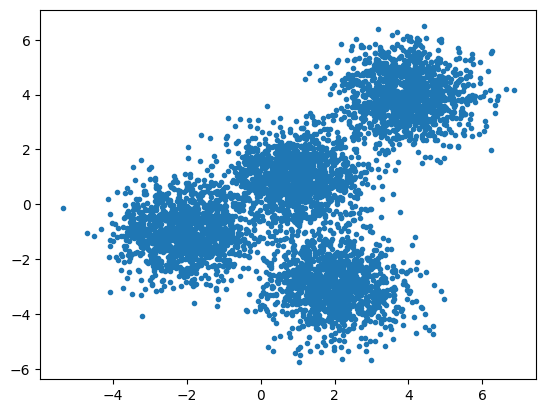

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker=".")

<h2 id="setting_up_K_means">K-Means تنظیم</h2>

اکنون که داده‌های تصادفی خود را داریم، بیایید خوشه‌بندی $K\_Means$ خود را تنظیم کنیم 

کلاس $K\_Means$ دارای پارامترهای زیادی است که می‌توان از آنها استفاده کرد، اما ما از این سه مورد استفاده خواهیم کرد

- **$init$**: روش مقداردهی اولیه $centroids$
  - مقدار : "k-means++"
  - $k\_means++$ : مراکز خوشه اولیه را برای خوشه‌بندی $k\_means$ به روشی هوشمندانه انتخاب می‌کند تا همگرایی سرعت یابد

- **$n\_clusters$** : تعداد خوشه‌هایی که باید تشکیل شوند و همچنین تعداد $centroids$ که باید تولید شوند
  - مقدار: 4 (از آنجا که 4 مرکز داریم)

- **$n\_init$**: تعداد دفعاتی که الگوریتم $k\_means$ با دانه‌های $centroid$ مختلف اجرا خواهد شد
  - مقدار :  $12$
  - نتایج نهایی بهترین خروجی از $n\_init$ اجرای متوالی از نظر $inertia$ خواهد بود 
  
اول $KMeans$ را با این پارامترها مقداردهی اولیه کن، جایی که پارامتر خروجی، $k\_means$ نامیده می‌شود

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

اکنون مدل $KMeans$ را با ماتریس ویژگی $X$ که قبلاً ایجاد کردیم برازش دهید 

In [6]:
k_means.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",12
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


برچسب‌های هر نقطه در مدل را با استفاده از ویژگی $labels\_$ $KMeans$ استخراج کرده و آن را به عنوان $k\_means\_labels$ ذخیره کنید 

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

مختصات مراکز خوشه‌ها را نیز با استفاده از $cluster\_centers\_$ $KMeans$ به دست آورده و آن را به عنوان $k\_means\_cluster\_centers$ ذخیره می‌کنیم

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">ایجاد نمودار بصری</h2>

!حال که داده‌های تصادفی تولید شده و مدل $KMeans$ مقداردهی اولیه شده است، بیایید آنها را ترسیم کرده و ببینیم چگونه به نظر می‌رسند 

لطفاً کد و نظرات را به دقت مطالعه کنید تا نحوه ترسیم مدل را درک کنید

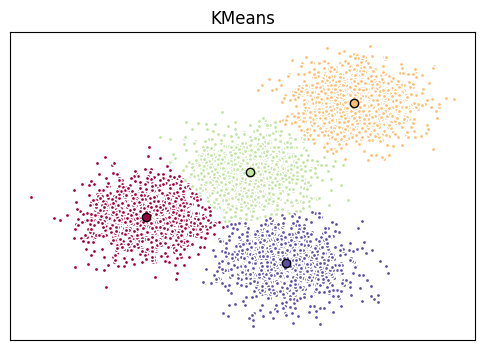

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col,  markeredgecolor="k", markersize=6)

# Title of the plot
ax.set_title("KMeans")

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## تمرین

سعی کنید مجموعه داده فوق را در 3 خوشه دسته‌بندی کنید\
**توجه:** داده‌ها را مجدداً تولید نکنید، از همان مجموعه داده قبلی استفاده کنید

In [10]:
# کد خود را اینجا بنویسید



<details><summary>برای مشاهده جواب اینجا کلیک کنید</summary>

```python
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col,  markeredgecolor="k", markersize=6)
plt.show()

```

</details>



<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

In [11]:
import requests

url = "https://raw.githubusercontent.com/HAKAN-Fatemi/machine-learning-HAKAN/main/file_csv/Cust_Segmentation.csv"
response = requests.get(url)

with open("Cust_Segmentation.csv", "wb") as f:
    f.write(response.content)

### بارگذاری داده از فایل CSV

پیش از کار با داده‌ها، باید از آدرس $URL$ برای دریافت فایل $Cust_Segmentation.csv$ استفاده کنید 

In [12]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">پیش‌پردازش</h2


همانطور که مشاهده می‌کنید، ستون **$Address$** در این مجموعه داده یک متغیر دسته‌ای است

الگوریتم $k\_means$ به طور مستقیم برای متغیرهای دسته‌ای قابل اعمال نیست زیرا تابع فاصله اقلیدسی برای متغیرهای گسسته معنی‌دار نیست

بنابراین، این ویژگی را حذف کرده و خوشه‌بندی را اجرا می‌کنیم

In [13]:
df = cust_df.drop("Address", axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### نرمال‌سازی بر اساس انحراف معیار

اکنون مجموعه داده را نرمال‌سازی می‌کنیم

 اما اصلاً چرا به نرمال‌سازی نیاز داریم؟ نرمال‌سازی یک روش آماری است 
 
 که به الگوریتم‌های مبتنی بر ریاضی کمک می‌کند تا ویژگی‌های با مقادیر و توزیع‌های مختلف را به طور یکسان تفسیر کنند
 
 ما از **$StandardScaler()$** برای نرمال‌سازی مجموعه داده خود استفاده می‌کنیم


In [14]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]], shape=(850, 8))

<h2 id="modeling">مدل‌سازی</h2>


در مثال ما (اگر به الگوریتم $k\_means$ دسترسی نداشتیم)، این کار معادل حدس زدن این بود 

که هر گروه مشتری دارای سن، درآمد، تحصیلات و غیره خاصی است که با آزمایش‌ها و تست‌های متعدد انجام می‌شد

با این حال، با استفاده از خوشه‌بندی $K\_means$ می‌توانیم این فرآیند را بسیار ساده‌تر انجام دهیم

بیایید $k\_means$ را روی مجموعه داده خود اعمال کنیم و به برچسب‌های خوشه نگاهی بیندازیم

In [15]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[1 0 2 1 0 0 1 1 1 0 2 1 1 1 2 1 1 1 0 1 1 1 2 0 0 1 1 1 1 1 1 0 2 1 1 1 2
 2 1 0 2 0 1 0 1 0 1 1 1 1 0 0 2 1 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 0 1 1 2 0 1 0 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 0 1 2 2 0 1 1 1 1 1
 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2
 1 1 1 0 2 1 1 1 1 0 2 2 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 2 0 2 1 1 0 2
 0 1 1 1 1 1 0 1 2 1 1 1 0 0 1 0 1 2 1 1 2 1 0 1 2 1 1 1 1 1 2 2 0 1 1 2 0
 1 1 1 1 0 1 1 2 1 1 1 1 0 1 1 2 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 2 1 2 1
 1 1 0 1 2 0 2 1 0 1 1 2 1 1 1 1 2 2 2 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 2 1 1
 2 1 2 0 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 0 1 2 1 1 1 2 2 1 1 1 0 2
 1 1 2 1 0 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 2 1 2 1 1 1 0 0 1
 2 1 0 2 2 1 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 1 1 1 2 1 1 2 2
 0 1 1 1 1 1 2 2 1 0 2 0 1 1 2 1 1 0 0 1 2 1 1 0 1 2 1 0 1 1 1 0 1 1 1 1 0
 1 2 1 1 1 1 0 2 1 1 0 1 2 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 2 1
 2 1 1 1 1 1 0 2 2 1 0 1 

### روش آرنج و انتخاب K=3

**شرح مختصر روش آرنج** 

روش آرنج یک رویکرد بصری در خوشه‌بندی $K\_Means$ است که برای تعیین تعداد بهینه خوشه‌ها ($k$) استفاده می‌شود

این روش شامل رسم **مجموع مربعات درون خوشه‌ای $(WCSS)$** در مقابل مقادیر مختلف $k$ و شناسایی نقطه‌ای است که نرخ کاهش به طور ناگهانی کند می‌شود 

و یک `آرنج` در منحنی تشکیل می‌دهد. این نقطه نشان‌دهنده بهترین تعادل بین دقت مدل و سادگی آن است

**دلیل انتخاب $K$=$3$**  

در نمودار آرنج، $WCSS$ از **$1$ =$K$** تا **$3$ =$K$** به شدت کاهش می‌یابد که نشان‌دهنده بهبود قابل توجه در فشردگی خوشه‌ها است

پس از **$3$ =$K$**، منحنی مسطح شده و خوشه‌های اضافی تنها بهبودهای جزئی ایجاد می‌کنند. بنابراین، **$3$ =$K$** بهترین نقطه تعادل بین عملکرد و پیچیدگی را ارائه می‌دهد


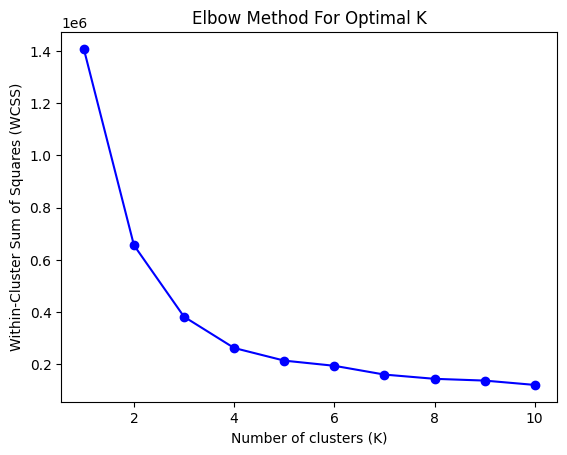

In [16]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, "bo-")
plt.xlabel("Number of clusters (K)") # تعداد خوشه‌ها (K)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)") #   مجموع مربعات درون خوشه‌ای (WCSS) 
plt.title("Elbow Method For Optimal K") #روش آرنج برای تعیین K بهینه
plt.show()


<h2 id="insights">بینش‌ها</h2>

برچسب‌ها را به هر سطر در $dataframe$ اختصاص می‌دهیم

In [17]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


می‌توانیم مقادیر مرکز خوشه‌ها را به راحتی با میانگین‌گیری از ویژگی‌های هر خوشه بررسی کنیم

In [18]:
df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


:حالا بیایید به توزیع مشتریان بر اساس سن و درآمد نگاه کنیم

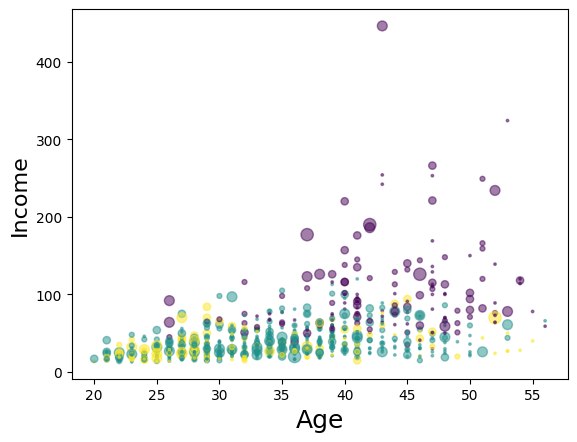

In [19]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel("Age", fontsize=18)
plt.ylabel("Income", fontsize=16)

plt.show()


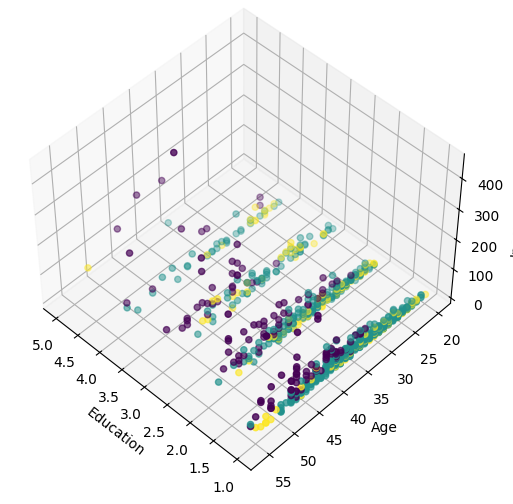

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Clear axis labels mapping for consistency
ax.set_xlabel("Education")  # X[:, 1]
ax.set_ylabel("Age")       # X[:, 0]  
ax.set_zlabel("Income")    # X[:, 3]

# Set viewing angle
ax.view_init(elev=48, azim=134)

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float))

plt.show()

الگوریتم $k\_means$ مشتریان شما را به گروه‌های جداگانه تقسیم می‌کند، برای مثال به ۳ خوشه

مشتریان در هر خوشه از نظر ویژگی‌های جمعیت‌شناختی به یکدیگر شبیه هستند


اکنون می‌توانیم برای هر گروه پروفایل ایجاد کنیم و ویژگی‌های مشترک هر خوشه را در نظر بگیریم


:برای مثال، سه خوشه می‌توانند به این صورت باشند

*   ثروتمند، تحصیل‌کرده و مسن
*   میانسال با درآمد متوسط
*   جوان با درآمد کم


<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
